In [5]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf 
print(tf.__version__)

2.0.0-beta1


In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
data = load_breast_cancer()

In [9]:
type(data)

sklearn.utils.Bunch

In [11]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
data.data.shape 

(569, 30)

In [13]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
print('Train score', model.evaluate(X_train, y_train))
print('Test score', model.evaluate(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 600us/sample - loss: 0.5138 - accuracy: 0.7375 - val_loss: 0.5340 - val_accuracy: 0.7234
Epoch 2/100
381/381 [==============================] - 0s 82us/sample - loss: 0.4595 - accuracy: 0.8110 - val_loss: 0.4781 - val_accuracy: 0.7872
Epoch 3/100
381/381 [==============================] - 0s 85us/sample - loss: 0.4127 - accuracy: 0.8478 - val_loss: 0.4315 - val_accuracy: 0.8245
Epoch 4/100
381/381 [==============================] - 0s 75us/sample - loss: 0.3751 - accuracy: 0.8635 - val_loss: 0.3916 - val_accuracy: 0.8564
Epoch 5/100
381/381 [==============================] - 0s 75us/sample - loss: 0.3429 - accuracy: 0.8845 - val_loss: 0.3585 - val_accuracy: 0.8830
Epoch 6/100
381/381 [==============================] - 0s 90us/sample - loss: 0.3162 - accuracy: 0.9108 - val_loss: 0.3311 - val_

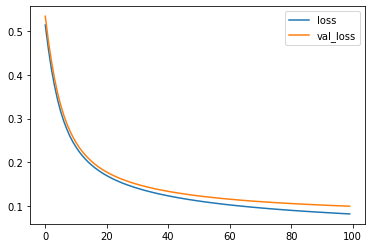

In [27]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

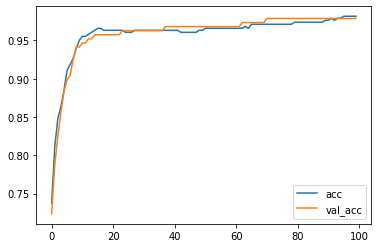

In [28]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [29]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[9.99200583e-01]
 [3.84449959e-06]
 [9.79683399e-02]
 [9.96770501e-01]
 [9.96961236e-01]
 [2.82198191e-04]
 [9.68684196e-01]
 [2.13241875e-02]
 [1.18986338e-01]
 [6.16908073e-06]
 [1.03043914e-02]
 [9.99889851e-01]
 [8.75224829e-01]
 [1.98290229e-01]
 [4.16824520e-02]
 [1.18544757e-01]
 [1.79333091e-02]
 [9.99367833e-01]
 [7.52128482e-01]
 [9.91419435e-01]
 [9.99646306e-01]
 [9.99672651e-01]
 [1.14036024e-01]
 [1.06325716e-01]
 [8.80181789e-04]
 [8.72034431e-01]
 [9.42629158e-01]
 [9.91468430e-01]
 [9.96879220e-01]
 [2.72691250e-05]
 [9.94016349e-01]
 [9.24239397e-01]
 [9.99477386e-01]
 [3.06905806e-02]
 [8.72941613e-01]
 [9.97926772e-01]
 [9.59905624e-01]
 [9.53674316e-07]
 [5.74570894e-03]
 [9.99348521e-01]
 [9.92494643e-01]
 [9.29228723e-01]
 [8.27908516e-05]
 [9.55929518e-01]
 [9.97812033e-01]
 [9.79066372e-01]
 [9.79273856e-01]
 [9.92109656e-01]
 [2.19124556e-03]
 [1.48355961e-04]
 [4.17717695e-02]
 [9.99138355e-01]
 [5.34742773e-02]
 [9.98465419e-01]
 [9.98983502e-01]
 [8.619129

In [39]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.]


In [31]:
import numpy as np
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.006281122679945677
188/188 [==============================] - 0s 83us/sample - loss: 0.0995 - accuracy: 0.9787
Evaluate output: [0.09947264860285089, 0.9787234]


In [35]:
model.save('linearclassifier.h5')

In [37]:
!ls -lh 

total 24K
-rw-r--r-- 1 root root  19K Apr 30 08:30 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Apr 21 13:39 sample_data
